# Hoja de trabajo 3

- Diego Morales
- Alejandro Azurdia

In [278]:
# Importar librerías Generales
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import locale
from scipy.stats import anderson
import statsmodels.api as sm
from ydata_profiling import ProfileReport

%matplotlib inline

In [279]:
df = pd.read_csv('manzanas.csv') 

In [280]:
# 1.1. Realicen una exploración rápida de sus datos. Para eso hagan un resumen de su conjunto de datos

In [281]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        print(f"Cannot convert {x}")
        return None
    
# Elimina la última fila del df. 
df = df.iloc[:-1] 

df['Acidez'] = df['Acidez'].apply(convert_to_float)

In [282]:
# Eliminar la columna ID
df = df.drop(columns=['ID'])

In [283]:
# Transformar la columna calidad a numérica con dummy variables
df = pd.get_dummies(df, columns=['Calidad'], drop_first=True)

df.head()


,Tamaño,Peso,Dulzura,Textura,Humedad,Madurez,Acidez,Calidad_mala
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,False
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,False
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,True
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,False
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,False


# 1. Parte 1 – Análisis exploratorio de datos
1.1. Realicen una exploración rápida de sus datos.  Para eso hagan un resumen de su conjunto de datos.


In [284]:
#profile = ProfileReport(df, title="Profiling Report")
#profile

In [285]:
df['Tamaño'].describe()

count    4000.000000
mean       -0.503015
std         1.928059
min        -7.151703
25%        -1.816765
50%        -0.513703
75%         0.805526
max         6.406367
Name: Tamaño, dtype: float64

In [286]:
df['Peso'].describe()

count    4000.000000
mean       -0.989547
std         1.602507
min        -7.149848
25%        -2.011770
50%        -0.984736
75%         0.030976
max         5.790714
Name: Peso, dtype: float64

In [287]:
df['Dulzura'].describe()

count    4000.000000
mean       -0.470479
std         1.943441
min        -6.894485
25%        -1.738425
50%        -0.504758
75%         0.801922
max         6.374916
Name: Dulzura, dtype: float64

In [288]:
df['Textura'].describe()

count    4000.000000
mean        0.985478
std         1.402757
min        -6.055058
25%         0.062764
50%         0.998249
75%         1.894234
max         7.619852
Name: Textura, dtype: float64

In [289]:
df['Humedad'].describe()

count    4000.000000
mean        0.512118
std         1.930286
min        -5.961897
25%        -0.801286
50%         0.534219
75%         1.835976
max         7.364403
Name: Humedad, dtype: float64

In [290]:
df['Madurez'].describe()

count    4000.000000
mean        0.498277
std         1.874427
min        -5.864599
25%        -0.771677
50%         0.503445
75%         1.766212
max         7.237837
Name: Madurez, dtype: float64

In [291]:
df['Acidez'].describe()

count    4000.000000
mean        0.076877
std         2.110270
min        -7.010538
25%        -1.377424
50%         0.022609
75%         1.510493
max         7.404736
Name: Acidez, dtype: float64

In [292]:
df['Calidad_mala'].describe()

count      4000
unique        2
top       False
freq       2004
Name: Calidad_mala, dtype: object

## 1.2 Enuncien el tipo de cada una de las variables del conjunto de datos (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

In [293]:
# Obtener el nombre de todas las columnas
df.columns

# obtener el nombre de todas las columnas y el primer valor de cada una. 
for col in df.columns:
    print(f"{col}: {df[col].iloc[0]}")

Tamaño: -3.970048523
Peso: -2.512336381
Dulzura: 5.346329613
Textura: -1.012008712
Humedad: 1.844900361
Madurez: 0.329839797
Acidez: -0.491590483
Calidad_mala: False


| Variable   | Tipo                  |
|------------|-----------------------|
| tamaño     | cuantitativa continua |
| peso       | cuantitativa continua |
| dulzura    | cuantitativa continua |
| textura    | cuantitativa continua |
| humedad    | cuantitativa continua |
| madurez    | cuantitativa continua |
| acidez     | cuantitativa continua |
| calidad_mala | cualitativa nominal |

Distribución de las variables numéricas

Text(0.5, 1.0, 'Tamaño')

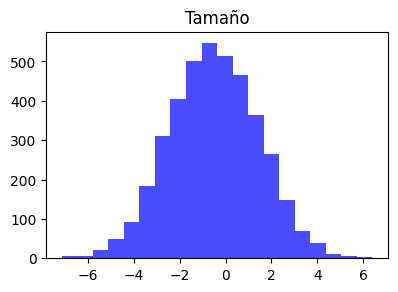

In [294]:
# Histograma de las variables cuantitativas
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.hist(df['Tamaño'], bins=20, alpha=0.7, color='blue')
plt.title('Tamaño')


Text(0.5, 1.0, 'Peso')

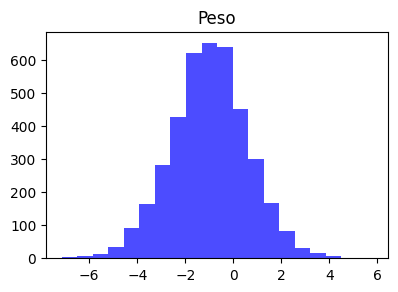

In [295]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 2)
plt.hist(df['Peso'], bins=20, alpha=0.7, color='blue')
plt.title('Peso')


Text(0.5, 1.0, 'Dulzura')

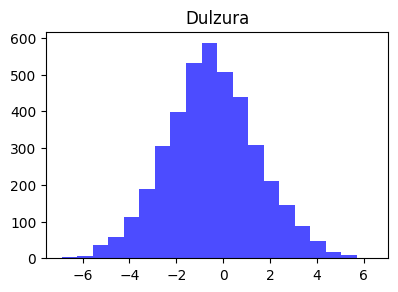

In [296]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 3)
plt.hist(df['Dulzura'], bins=20, alpha=0.7, color='blue')
plt.title('Dulzura')

Text(0.5, 1.0, 'Textura')

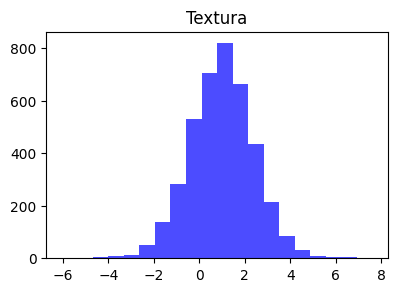

In [297]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 4)
plt.hist(df['Textura'], bins=20, alpha=0.7, color='blue')
plt.title('Textura')

Text(0.5, 1.0, 'Humedad')

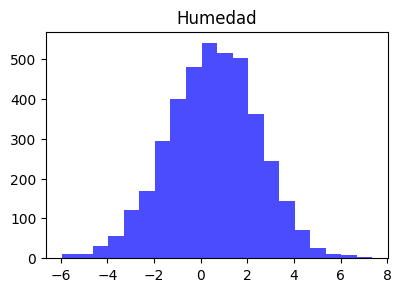

In [298]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 5)
plt.hist(df['Humedad'], bins=20, alpha=0.7, color='blue')
plt.title('Humedad')

Text(0.5, 1.0, 'Madurez')

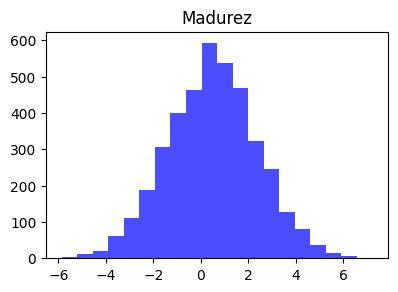

In [299]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 6)
plt.hist(df['Madurez'], bins=20, alpha=0.7, color='blue')
plt.title('Madurez')

Text(0.5, 1.0, 'Acidez')

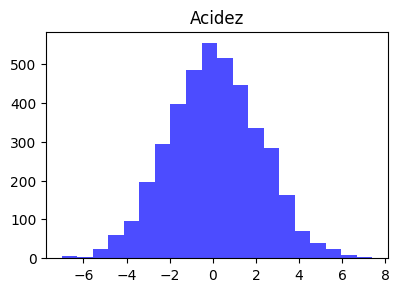

In [300]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 7)
plt.hist(df['Acidez'], bins=20, alpha=0.7, color='blue')
plt.title('Acidez')

In [301]:
# correlación entre las variables cuantitativas y la variable calidad
df.corr()

,Tamaño,Peso,Dulzura,Textura,Humedad,Madurez,Acidez,Calidad_mala
Tamaño,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,-0.244007
Peso,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,-0.001421
Dulzura,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,-0.250998
Textura,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,0.012376
Humedad,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,-0.260223
Madurez,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,0.264315
Acidez,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,0.007697
Calidad_mala,-0.244007,-0.001421,-0.250998,0.012376,-0.260223,0.264315,0.007697,1.000000


Tabla de frecuencias de variables categoricas

<Axes: xlabel='Calidad_mala'>

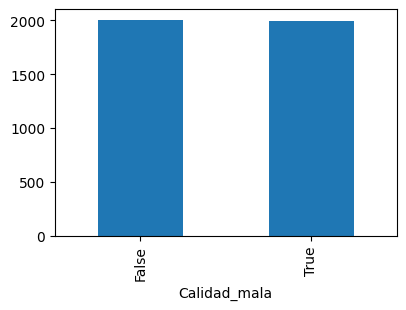

In [302]:
#Graficares de barras de las variables categóricas
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 8)
df['Calidad_mala'].value_counts().plot(kind='bar')


In [303]:
# Verificar si hay NaNs o valores nulos
df.isna().sum()

Tamaño          0
Peso            0
Dulzura         0
Textura         0
Humedad         0
Madurez         0
Acidez          0
Calidad_mala    0
dtype: int64

No se encuentran valores NaN o Nulls

# Parte II

KNN

In [304]:
# Algoritmo KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

acuracy_dict = {}

X = df.drop(columns=['Calidad_mala'])
y = df['Calidad_mala']

In [305]:
X.head()

,Tamaño,Peso,Dulzura,Textura,Humedad,Madurez,Acidez
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [306]:
y.head()

0    False
1    False
2     True
3    False
4    False
Name: Calidad_mala, dtype: bool

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [308]:
y_pred = knn.predict(X_test)

In [309]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.90      0.90       607
        True       0.90      0.90      0.90       593

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



In [310]:
tasa_error = []

# Puede tardar un poco
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

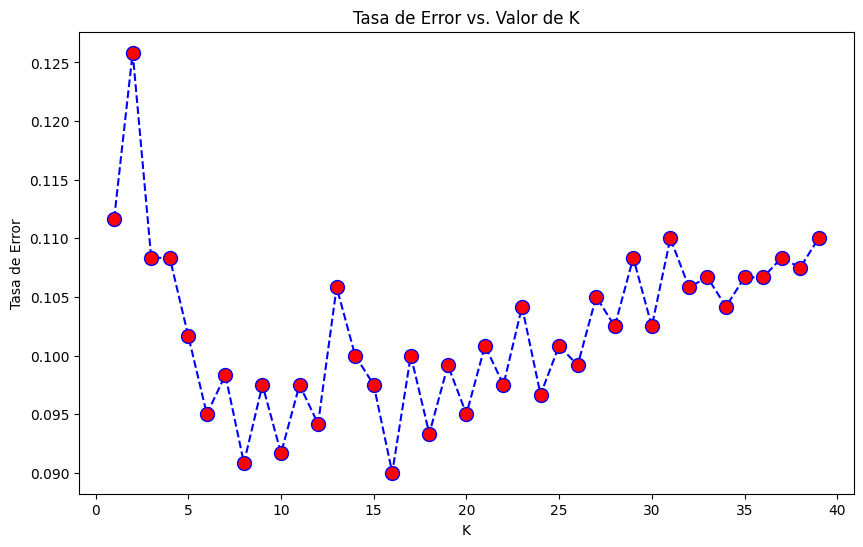

In [311]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

In [312]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K = 16')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

# obtener el valor de acuraccy como value de acuracy_dict
acuracy_dict['knn score'] = knn.score(X_test, y_test)


CON K = 16

Matriz de Confusión

[[555  52]
 [ 56 537]]


              precision    recall  f1-score   support

       False       0.91      0.91      0.91       607
        True       0.91      0.91      0.91       593

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



La mayor presicion que se pudo obtener con KNN fue de 91%

In [313]:
# Algoritmo de Regresión Logística
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter = 500)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [314]:
predictions = logmodel.predict(X_test)

In [315]:
print()
print(classification_report(y_test,predictions))

# obtener el valor de acuraccy como value de acuracy_dict
acuracy_dict['logistic regression score'] = logmodel.score(X_test, y_test)
print(acuracy_dict)


              precision    recall  f1-score   support

       False       0.75      0.76      0.76       607
        True       0.75      0.75      0.75       593

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

{'knn score': 0.91, 'logistic regression score': 0.7525}


La mayor presicion que se pudo obtener con el algoritmo de regresión logística fue de 75%

In [316]:
# Algoritmo de SVM
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [317]:
y_pred = model.predict(X_test)

In [318]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.90      0.90       607
        True       0.90      0.90      0.90       593

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



In [319]:
# Algoritmo de SVM con kernel polinomial
model = SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

SVC(kernel='poly')

In [320]:
y_pred = model.predict(X_test)

In [321]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.94      0.88       607
        True       0.93      0.80      0.86       593

    accuracy                           0.87      1200
   macro avg       0.88      0.87      0.87      1200
weighted avg       0.88      0.87      0.87      1200



In [322]:
model = SVC(kernel = 'rbf', C = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# obtener el valor de acuraccy como value de acuracy_dict
acuracy_dict['SVM score'] = model.score(X_test, y_test)

              precision    recall  f1-score   support

       False       0.90      0.90      0.90       607
        True       0.90      0.90      0.90       593

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



In [323]:
model = SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.53      0.52      0.53       607
        True       0.52      0.53      0.52       593

    accuracy                           0.53      1200
   macro avg       0.53      0.53      0.53      1200
weighted avg       0.53      0.53      0.53      1200



In [324]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# obtener el valor de acuraccy como value de acuracy_dict
acuracy_dict['SVM Kernel '] = model.score(X_test, y_test)

              precision    recall  f1-score   support

       False       0.75      0.76      0.76       607
        True       0.75      0.74      0.75       593

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



La mayor presicion que se pudo obtener con SVM fue de 90% con un kernel polinomial de grado 3

## Naive Bayes

In [325]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Obtención de datos (nuevamente)
X = df.drop(columns=['Calidad_mala'])
y = df['Calidad_mala']

# Separación de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo
gnb = GaussianNB()

# Entrenamiento del modelo
gnb.fit(X_train, y_train)

# Predicción
y_pred = gnb.predict(X_test)

# Evaluación del modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

# obtener el valor de acuraccy como value de acuracy_dict
acuracy_dict['Naive Bayes score'] = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.7625
              precision    recall  f1-score   support

       False       0.77      0.75      0.76       399
        True       0.76      0.78      0.77       401

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



## Árboles de Desición

In [326]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# obtención de datos
X = df.drop(columns=['Calidad_mala'])
y = df['Calidad_mala']

# Separación de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creación del modelo
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

# Entrenamiento del modelo
clf.fit(X_train,y_train)

# Predicción
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

# obtener el valor de acuraccy como value de acuracy_dict
acuracy_dict['Decision Tree score'] = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.805
              precision    recall  f1-score   support

       False       0.80      0.81      0.80       399
        True       0.81      0.80      0.80       401

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.80       800
weighted avg       0.81      0.81      0.81       800



## Random Forest

In [327]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Calidad_mala'])
y = df['Calidad_mala']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pre processing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mat_conf = confusion_matrix(y_test, y_pred)
print(mat_conf)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

# obtener el valor de acuraccy como value de acuracy_dict
acuracy_dict['Random Forest score'] = metrics.accuracy_score(y_test, y_pred)

[[361  38]
 [ 50 351]]
Accuracy: 0.89
              precision    recall  f1-score   support

       False       0.88      0.90      0.89       399
        True       0.90      0.88      0.89       401

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



## Conclusiones

In [329]:
# las value de acuracy_dict deben tener 4 decimales. 
acuracy_dict = {k: round(v, 4) for k, v in acuracy_dict.items()}

# convertir el diccionario a un dataframe
acuracy_df = pd.DataFrame(acuracy_dict.items(), columns=['Model', 'Accuracy'])

# ordenar el dataframe por Accuracy en orden descendente
acuracy_df = acuracy_df.sort_values(by='Accuracy', ascending=False)
acuracy_df

,Model,Accuracy
0,knn score,0.9100
2,SVM score,0.8983
6,Random Forest score,0.8900
5,Decision Tree score,0.8050
4,Naive Bayes score,0.7625
3,SVM Kernel,0.7533
1,logistic regression score,0.7525


Después de obtener los resultados en las mejores iteraciones de ejecución de los modelos, podemos afirmar que el mejor modelo para este conjunto de datos es KNN. Esto puede deberse a diferentes factores. KNN es un modelo perfecto para este conjunto de datos, porque todos las instancias de las clases están cercanos. KNN también es perfecto para capturar patrones complejos al considerar vecinos cercanos, especialmente si no siguen una distribución en específico. Por último, una parte importante del éxito de la implementación del modelo puede ser atribuido a encontar el número de conjuntos perfecto para el modelo. En este caso, se iteró probando diferentes conjuntos hasta que se encontró el número perfecto. 
